In [1]:
from tensorflow.keras.models import load_model
import os
import glob
import pandas as pd
import numpy as np
import cv2

In [2]:
model = load_model('Model/4ArrCNNModel.keras')

In [3]:
targetMatrix = pd.read_json("Model/targetMatrix.json", orient='records')

Test verilerinin hazırlanması:

In [4]:
def GetImage(str_img):
    if(type(str_img) != type("")):
        return str_img
    img = cv2.imread(str_img, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (256, 256))


In [5]:
#Bütün değerlerle test edelim:

In [6]:
KlasorAdlari = ["AgricultralMap", "GreenAreaMap", "LivestockMap", "MinesMap", "RegionsMap"]
imageFolder = "images"
debugImagesFolder = "debugImages"


AgricultralMap = []
GreenAreaMap = []
LivestockMap = []
MinesMap = []
RegionsMap = []

for ka in KlasorAdlari:
    klasorler = [klasor for klasor in os.listdir(debugImagesFolder) if klasor.startswith(ka)]
    for klasor in klasorler:
        png_dosyalari = [(debugImagesFolder + "/" + klasor + "/") + dosya for dosya in os.listdir(debugImagesFolder + "/" + klasor) if dosya.endswith('.png')]
        if ka == "AgricultralMap":
            AgricultralMap.extend(png_dosyalari)
        elif ka == "GreenAreaMap":
            GreenAreaMap.extend(png_dosyalari)
        elif ka == "LivestockMap":
            LivestockMap.extend(png_dosyalari)
        elif ka == "MinesMap":
            MinesMap.extend(png_dosyalari)
        elif ka == "RegionsMap":
            RegionsMap.extend(png_dosyalari)

AgricultralMap = AgricultralMap[:1000]
GreenAreaMap = GreenAreaMap[:1000]
LivestockMap = LivestockMap[:1000]
MinesMap = MinesMap[:1000]
RegionsMap = RegionsMap[:1000]
            
for i in range(len(AgricultralMap)):
    AgricultralMap[i] = GetImage(AgricultralMap[i]) / 255
for i in range(len(GreenAreaMap)):
    GreenAreaMap[i] = GetImage(GreenAreaMap[i]) / 255
for i in range(len(LivestockMap)):
    LivestockMap[i] = GetImage(LivestockMap[i]) / 255
for i in range(len(MinesMap)):
    MinesMap[i] = GetImage(MinesMap[i]) / 255
for i in range(len(RegionsMap)):
    RegionsMap[i] = GetImage(RegionsMap[i]) / 255

In [7]:
data = {
    'AgricultralMap': AgricultralMap,
    'GreenAreaMap': GreenAreaMap,
    'LivestockMap': LivestockMap,
    'MinesMap': MinesMap
}

del AgricultralMap
del GreenAreaMap
del LivestockMap
del MinesMap

dataDF = pd.DataFrame(data)
del data

In [8]:
target = {
    'RegionsMap': RegionsMap
}
targetDF = pd.DataFrame(target)
del RegionsMap
del target

In [9]:
UnifiedMap = []
for i in range(len(dataDF["AgricultralMap"])):
    Arr = []
    Arr.append(dataDF["AgricultralMap"][i].tolist())
    Arr.append(dataDF["GreenAreaMap"][i].tolist())
    Arr.append(dataDF["LivestockMap"][i].tolist())
    Arr.append(dataDF["MinesMap"][i].tolist())
    UnifiedMap.append(Arr)

for i in range(len(UnifiedMap)):
    Arr = []
    for y in range(len(UnifiedMap[i][0])):
        ArrY = []
        for x in range(len(UnifiedMap[i][0][y])):
            ArrY.append([UnifiedMap[i][0][y][x], UnifiedMap[i][1][y][x], UnifiedMap[i][2][y][x], UnifiedMap[i][3][y][x]])
        Arr.append(ArrY)
    UnifiedMap[i] = Arr
    
UnifiedMap = np.array(UnifiedMap)

# AI

In [10]:
predictions = model.predict(UnifiedMap)

32/32 [==============================] - 2s 58ms/step


In [11]:
arr = []
for i in range(len(predictions)):
    arr.append(np.argmax(predictions[i]))

print(arr)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 222, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 125, 0, 1, 0, 0, 253, 1, 0, 0, 0, 0, 125, 125, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 253, 0, 0, 0, 0, 1, 1, 0, 0, 1, 125, 0, 0, 0, 1, 0, 0, 0, 1, 0, 222, 0, 1, 0, 0, 1, 0, 0, 253, 1, 0, 0, 0, 253, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 253, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 253, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

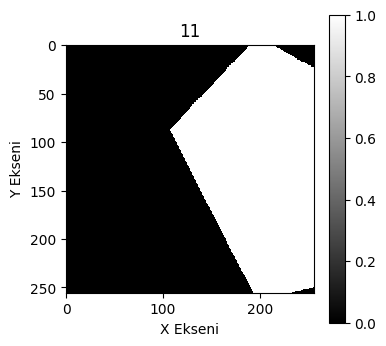

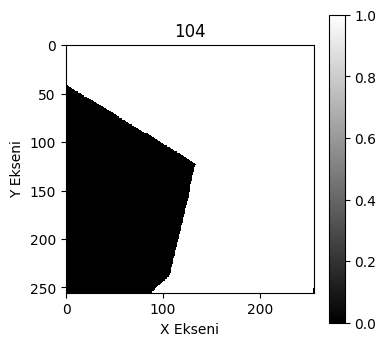

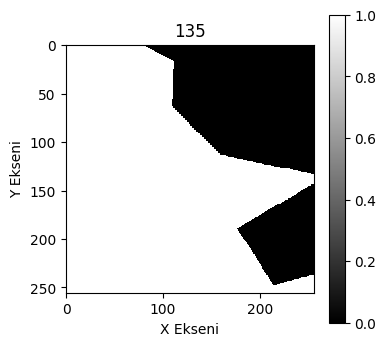

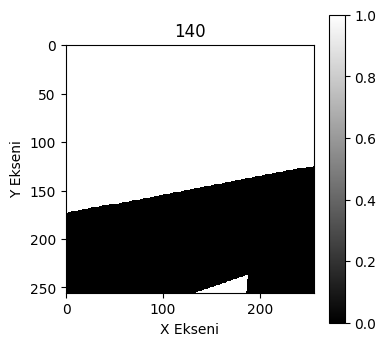

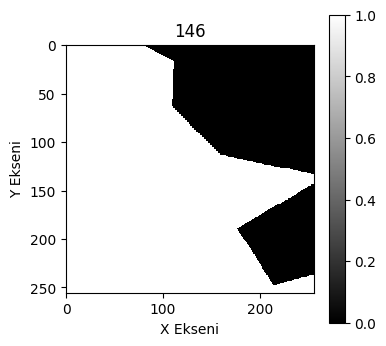

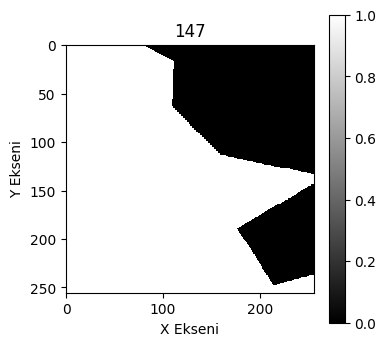

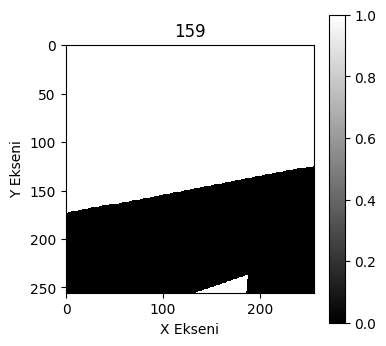

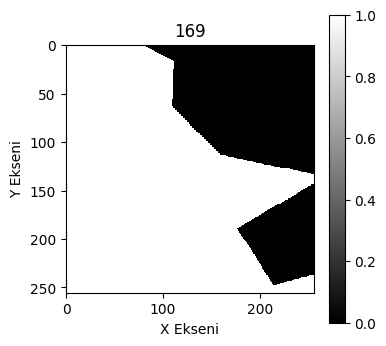

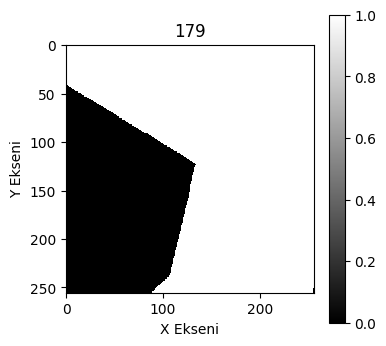

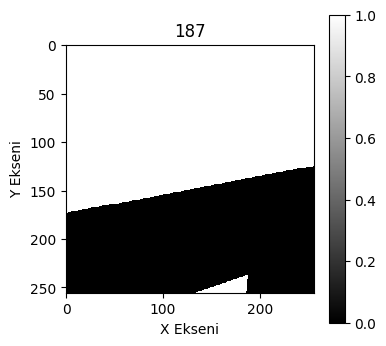

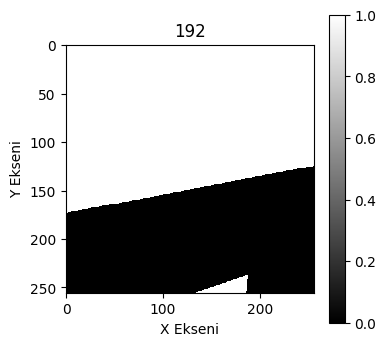

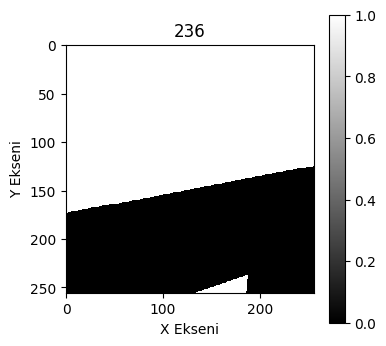

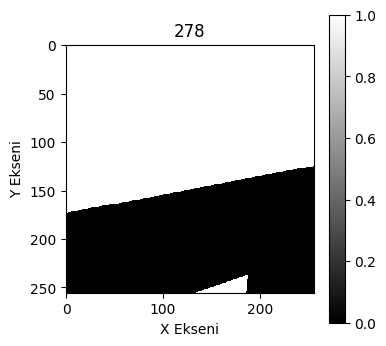

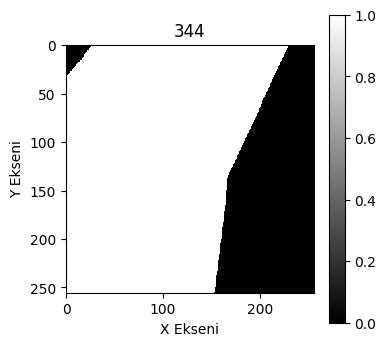

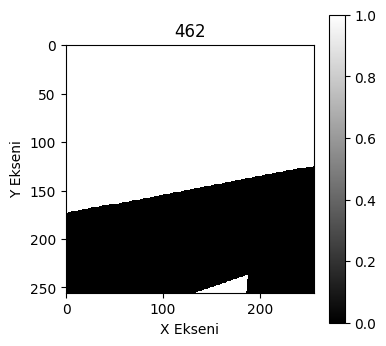

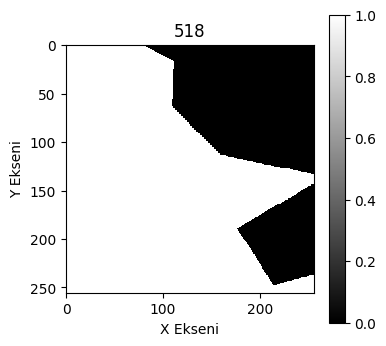

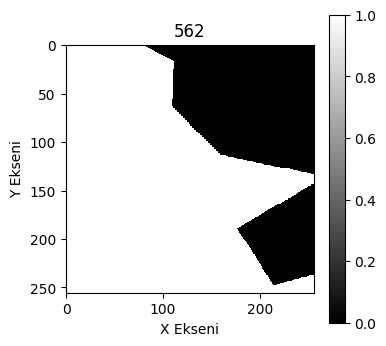

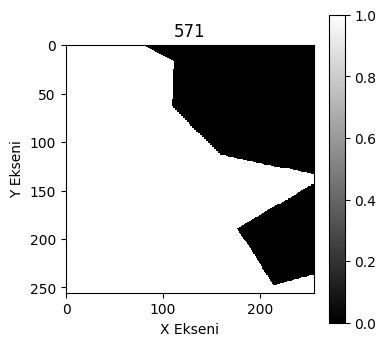

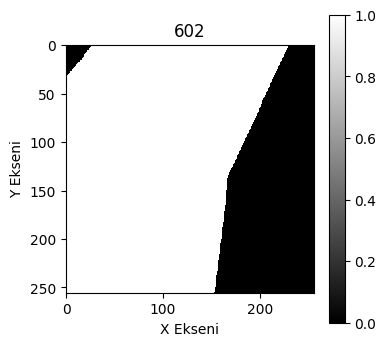

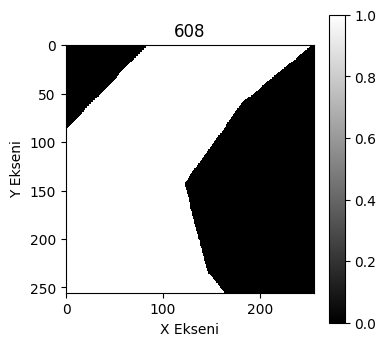

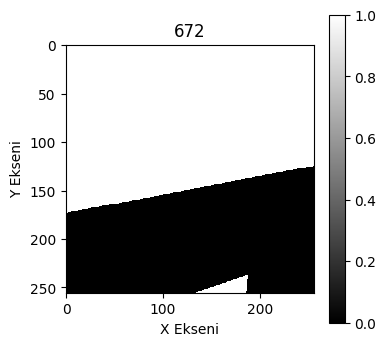

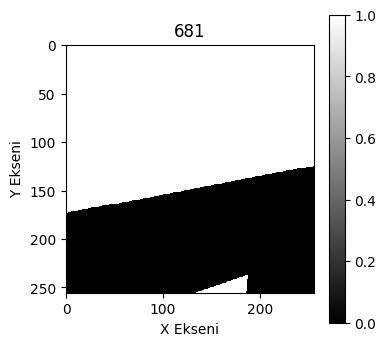

In [13]:
import matplotlib.pyplot as plt

for i in range(len(arr)):
    if(len(np.unique(targetMatrix["matrix"][arr[i]])) == 1):
        continue
    plt.figure(figsize=(4, 4))
    plt.imshow((targetMatrix["matrix"][arr[i]]), cmap='gray', interpolation='nearest')
    plt.title(i)
    plt.xlabel('X Ekseni')
    plt.ylabel('Y Ekseni')
    plt.grid(False)
    plt.colorbar()  # Renk skalası eklemek isterseniz
    plt.show()